# HNCDI Explain:  Grover Tutorial 1

This is tutorial 1 on Grover's Algorithm. This is a 2-qubit example, with 1-Grover iteration. 

__Task__. In cell 2, modify the circuit for the oracle which marks different items. You should find that changing the circuit outputs a different bit-string corresponding to the good item. 

We will then implement Grover's algorithm, which can can be described in 3 main steps.

1. Create the superposition state $|s \rangle$.
2. Apply the circuit for the black box.
3. Apply the Grover Diffusion operator.

We will then submit this circuit to: 1) a simulator, 2) real quantum hardware.

In [1]:
# Import standard Qiskit libraries
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, Aer, IBMQ
from qiskit.compiler import transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit import execute
from qiskit.providers.ibmq import least_busy

__Task__. In the cell below, we will create the quantum circuit for the oracle that implements $f$. There are 4 different circuits that implement $f(x_m)$ for a different bit string $x_m$. By commenting out different circuits, see how this changes the good item found through Grover's algorithm.

As an example, remove the comments for qc.cz(0,1) and comment out the circuits below the remaining bit strings.

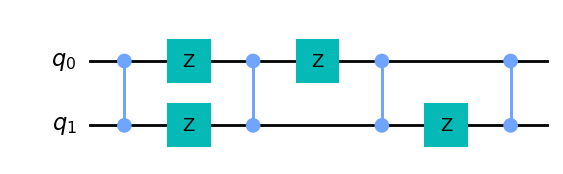

In [2]:
## Here we will create a quantum circuit for the oracle
qc = QuantumCircuit(2) 

### COMMENT OUT VARIUS CIRCUITS HERE ###

## 00 ## 
qc.cz(0,1)
qc.z(0)
qc.z(1)

## 01 ## 
qc.cz(0,1)
qc.z(0)

## 10 ## 
qc.cz(0,1)
qc.z(1)

## 11 ## 
qc.cz(0,1)

#Draw black box circuit
qc.draw('mpl') 

We will now step through Grover's algorithm. 

__Step 1__: Create the superposition state $|s \rangle$. To do this we will first create a quantum circuit of $n=2$ qubits and then apply a layer of Hadamard Gates, creating the state $|s \rangle = \sum_{x\in \{0,1\}^n} |x \rangle $.

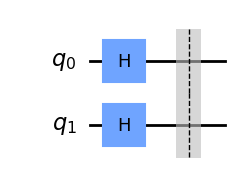

In [3]:
# Define no. of qubits to be n = 2 and create a quantum circuit called "circ" with an n-qubit register.
n = 2;
circ = QuantumCircuit(n)

#Apply a Hadamard gate to each qubit in the circuit.
for i in range(n):
    circ.h(i)

circ.barrier()
circ.draw('mpl') 

 __Step 2__. Apply the circuit for the black box. Apply the black box circuit $U_{O}$ that we have explicitly constructed and apply it to the state $|s \rangle $.

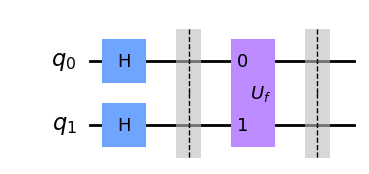

In [4]:
# Create a quantum circuit with a CZ gate
oracle = qc.to_gate()
oracle.name = "$U_f$"
circ.append(oracle, [0,1])
circ.barrier()
circ.draw('mpl') 

Step 3. Apply the Grover Diffusion operator.



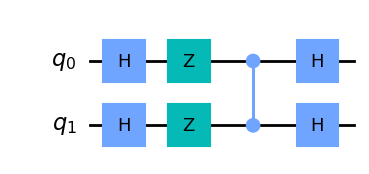

In [5]:
qc = QuantumCircuit(2)

for i in range(n):
    qc.h(i)
    qc.z(i)
    
qc.cz(0,1)
qc.h([0,1])

#draw diffuser
qc.draw('mpl')

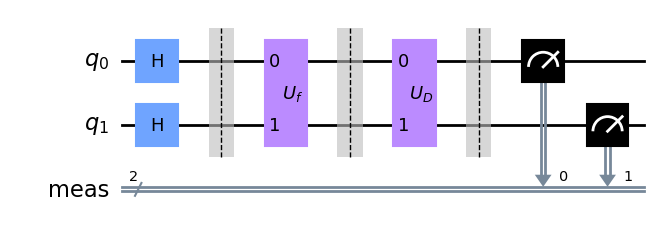

In [6]:
diffuser = qc.to_gate()
diffuser.name = "$U_D$"
circ.append(diffuser, [0,1])
circ.measure_all()
circ.draw('mpl') 

__Step 4__: We will now submit the quantum circuit to A) a simulator and B) a real quantum computer. 

In theory, we should find the bit-string corresponding to the good item $x_m$ with certainty.

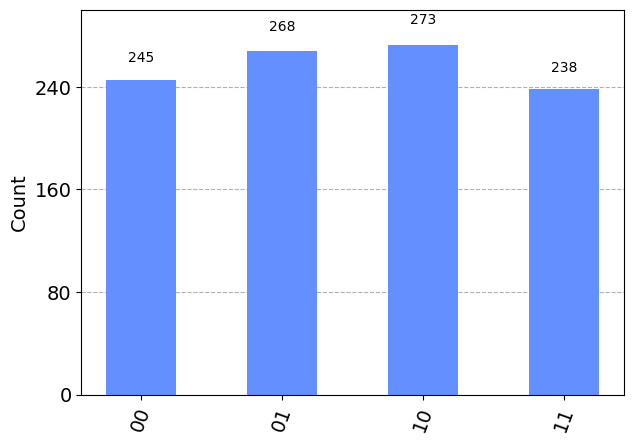

In [7]:
# OPTION 1: RUN ON QUANTUM SIMULATOR
backend = Aer.get_backend('qasm_simulator')
results = execute(circ, backend=backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)

ibmqfactory.load_account:WARNING:2023-06-26 20:24:49,558: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


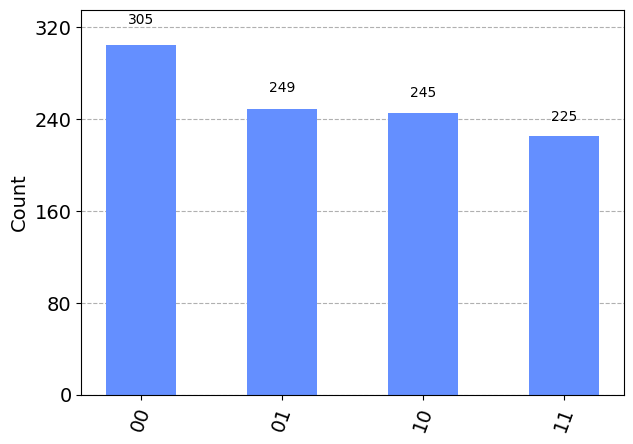

In [10]:
# OPTION 2: RUN ON QUANTUM HARDWARE

provider = IBMQ.load_account() 
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))
t_circ = transpile(circ, device, optimization_level=3)
job = execute(t_circ, backend = device, shots =1024, optimization_level = 3)
from qiskit.tools.monitor import job_monitor
job_monitor(job, interval = 2)
results = job.result()
answer = results.get_counts(circ)
plot_histogram(answer)